In [1]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
from cliffs_delta import cliffs_delta

In [2]:
time1 = pickle.load(
    open("/Users/marlenebultemann/Desktop/IUG/Journal_Deutschunterricht/models/competence_time_period_1.pkl", "rb")
)
time2 = pickle.load(
    open("/Users/marlenebultemann/Desktop/IUG/Journal_Deutschunterricht/models/competence_time_period_2.pkl", "rb")
)
time1 = time1.rename(columns={"ability": "ability_t1"})
time2 = time2.rename(columns={"ability": "ability_t2"})
time2 = time2[["UserID", "ability_t2"]]

final = pd.merge(time1, time2, on="UserID", how="inner")
final["change"] = final.ability_t2 - final.ability_t1

In [3]:
final

,UserID,ability_t1,interventiongroup,Geschlecht,Klassenstufe,ability_t2,change
0,499305,6.77015,4,m,10,1.25437,-5.51578
1,499305,6.77015,4,m,10,1.25437,-5.51578
2,499305,6.77015,4,m,10,1.25437,-5.51578
3,499305,6.77015,4,m,10,1.25437,-5.51578
4,499306,0.79506,2,m,10,4.78523,3.99017
...,...,...,...,...,...,...,...
3571,1043018,6.25562,4,w,9,5.47942,-0.77620
3572,1043305,1.80546,3,m,8,3.06444,1.25898
3573,1043305,1.80546,3,m,8,3.06444,1.25898
3574,1043305,1.80546,3,m,8,3.06444,1.25898


In [4]:
intvcontrol = final[(final["interventiongroup"] == "control")]
intv2 = final[(final["interventiongroup"] == "2")]
intv3 = final[(final["interventiongroup"] == "3")]
intv4 = final[(final["interventiongroup"] == "4")]
intv5 = final[(final["interventiongroup"] == "5")]
intv6 = final[(final["interventiongroup"] == "6")]

Check Mean and Median

In [5]:
ability_by_group = final.groupby(["interventiongroup"]).agg(
    {
        "ability_t1": "median",
        "ability_t2": "median",
        "change": "median",
        "Geschlecht": "count",
    }
)
ability_by_group = ability_by_group.rename(columns={"Geschlecht": "count"})
ability_by_group

,ability_t1,ability_t2,change,count
interventiongroup,,,,
2,3.43323,3.964825,0.290495,456
3,2.72828,3.544150,0.457820,588
4,2.61939,4.028830,0.854480,676
5,2.76571,3.898770,0.974940,524
6,2.42349,3.883365,1.210350,520
control,3.02071,3.845850,0.368730,812


In [6]:
ability_by_group = final.groupby(["interventiongroup"]).agg(
    {
        "ability_t1": "mean",
        "ability_t2": "mean",
        "change": "mean",
        "Geschlecht": "count",
    }
)
ability_by_group = ability_by_group.rename(columns={"Geschlecht": "count"})
ability_by_group

,ability_t1,ability_t2,change,count
interventiongroup,,,,
2,3.221242,3.439092,0.217849,456
3,2.833778,3.482728,0.648950,588
4,2.745159,3.638288,0.893130,676
5,2.605993,3.750456,1.144464,524
6,2.624220,3.661927,1.037707,520
control,3.062115,3.614208,0.552092,812


<AxesSubplot:xlabel='change', ylabel='interventiongroup'>

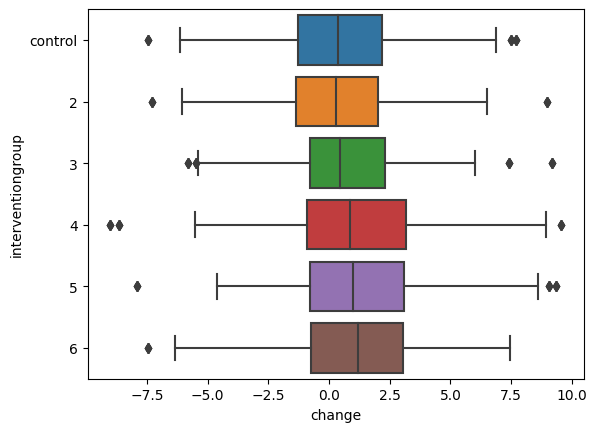

In [7]:
sns.boxplot(
    data=final,
    x="change",
    y="interventiongroup",
    showfliers=True,
    order=["control", "2", "3", "4", "5", "6"],
)

Wilcoxon Mann Whitney Tests and Cliffs Delta (# thresholds: .11 (small), .28 (medium), .43 (large))

In [8]:
# control group
groups = [intv2, intv3, intv4, intv5, intv6]
for x in groups:
    print(stats.mannwhitneyu(intvcontrol["change"], x["change"]))
    print(cliffs_delta(intvcontrol["change"], x["change"])[0])

MannwhitneyuResult(statistic=194720.0, pvalue=0.12563842235148148)
0.05176734940800277
MannwhitneyuResult(statistic=231024.0, pvalue=0.30216681789746913)
-0.0322710364934151
MannwhitneyuResult(statistic=252624.0, pvalue=0.008161554161628564)
-0.0795464482467135
MannwhitneyuResult(statistic=188096.0, pvalue=0.0003438876776589836)
-0.11585755649983079
MannwhitneyuResult(statistic=184464.0, pvalue=9.93782775001678e-05)
-0.12625994694960213


In [9]:
# Intv 2
groups = [intv3, intv4, intv5, intv6]
for x in groups:
    print(stats.mannwhitneyu(intv2["change"], x["change"]))
    print(cliffs_delta(intv2["change"], x["change"])[0])

MannwhitneyuResult(statistic=122624.0, pvalue=0.017913618018982315)
-0.08533237856546128
MannwhitneyuResult(statistic=133936.0, pvalue=0.0001820160163227062)
-0.1310079933561715
MannwhitneyuResult(statistic=99712.0, pvalue=7.791946513947393e-06)
-0.16539440203562342
MannwhitneyuResult(statistic=98016.0, pvalue=2.9309919452806033e-06)
-0.17327935222672064


In [10]:
# Intv 3
groups = [intv4, intv5, intv6]
for x in groups:
    print(stats.mannwhitneyu(intv3["change"], x["change"]))
    print(cliffs_delta(intv3["change"], x["change"])[0])

MannwhitneyuResult(statistic=188560.0, pvalue=0.11567375804773353)
-0.05124179849454575
MannwhitneyuResult(statistic=141056.0, pvalue=0.01502628550558008)
-0.08438489899776705
MannwhitneyuResult(statistic=137488.0, pvalue=0.003785988924198661)
-0.10068027210884353


In [11]:
# Intv 4
print(stats.mannwhitneyu(intv4["change"], intv5["change"]))
print(cliffs_delta(intv4["change"], intv5["change"])[0])
print(stats.mannwhitneyu(intv4["change"], intv6["change"]))
print(cliffs_delta(intv4["change"], intv6["change"])[0])

MannwhitneyuResult(statistic=171296.0, pvalue=0.32870849353518106)
-0.032837978228465604
MannwhitneyuResult(statistic=168560.0, pvalue=0.22404938303206123)
-0.040964952207555756


In [12]:
# Intv 5
print(stats.mannwhitneyu(intv5["change"], intv6["change"]))
print(cliffs_delta(intv5["change"], intv6["change"])[0])

MannwhitneyuResult(statistic=135248.0, pvalue=0.8387089190033309)
-0.00728126834997064


In [13]:
#Aufteilung nach Geschlecht
final_m = final.loc[final.Geschlecht == 'm']
final_w = final.loc[final.Geschlecht == 'w']
print(final_m)

       UserID  ability_t1 interventiongroup Geschlecht Klassenstufe  \
0      499305     6.77015                 4          m           10   
1      499305     6.77015                 4          m           10   
2      499305     6.77015                 4          m           10   
3      499305     6.77015                 4          m           10   
4      499306     0.79506                 2          m           10   
...       ...         ...               ...        ...          ...   
3567  1042963     0.54098           control          m            8   
3572  1043305     1.80546                 3          m            8   
3573  1043305     1.80546                 3          m            8   
3574  1043305     1.80546                 3          m            8   
3575  1043305     1.80546                 3          m            8   

      ability_t2   change  
0        1.25437 -5.51578  
1        1.25437 -5.51578  
2        1.25437 -5.51578  
3        1.25437 -5.51578  
4      

In [14]:
#split by interventiongroup
intvcontrol_m = final_m[(final_m["interventiongroup"]=='control')]
intv2_m = final_m[(final_m["interventiongroup"]=='2')]
intv3_m = final_m[(final_m["interventiongroup"]=='3')]
intv4_m = final_m[(final_m["interventiongroup"]=='4')]
intv5_m = final_m[(final_m["interventiongroup"]=='5')]
intv6_m = final_m[(final_m["interventiongroup"]=='6')]
print(intvcontrol_m)

intvcontrol_w = final_w[(final_w["interventiongroup"]=='control')]
intv2_w = final_w[(final_w["interventiongroup"]=='2')]
intv3_w = final_w[(final_w["interventiongroup"]=='3')]
intv4_w = final_w[(final_w["interventiongroup"]=='4')]
intv5_w = final_w[(final_w["interventiongroup"]=='5')]
intv6_w = final_w[(final_w["interventiongroup"]=='6')]

       UserID  ability_t1 interventiongroup Geschlecht Klassenstufe  \
8      499308     6.04589           control          m           10   
9      499308     6.04589           control          m           10   
10     499308     6.04589           control          m           10   
11     499308     6.04589           control          m           10   
68     707197     4.63233           control          m           12   
...       ...         ...               ...        ...          ...   
3551  1040910     1.41754           control          m            5   
3564  1042963     0.54098           control          m            8   
3565  1042963     0.54098           control          m            8   
3566  1042963     0.54098           control          m            8   
3567  1042963     0.54098           control          m            8   

      ability_t2   change  
8        1.16645 -4.87944  
9        1.16645 -4.87944  
10       1.16645 -4.87944  
11       1.16645 -4.87944  
68     

In [15]:
#controlgroup m
groups_m = [intv2_m, intv3_m, intv4_m, intv5_m, intv6_m]
for x in groups_m:
    print(stats.mannwhitneyu(intvcontrol_m['change'], x['change']))
    print(cliffs_delta(intvcontrol_m['change'], x['change'])[0])

MannwhitneyuResult(statistic=40832.0, pvalue=0.6021715318314862)
-0.025582283314242078
MannwhitneyuResult(statistic=49632.0, pvalue=0.01295208148926652)
-0.11168384879725086
MannwhitneyuResult(statistic=54016.0, pvalue=0.05739727396086619)
-0.08410200759631037
MannwhitneyuResult(statistic=37200.0, pvalue=0.11575766348542807)
-0.07811260904044409
MannwhitneyuResult(statistic=26704.0, pvalue=2.8281014722088217e-08)
-0.28307560137457044


In [16]:
#intv2 m
groups_m = [intv3_m, intv4_m, intv5_m, intv6_m]
for x in groups_m:
    print(stats.mannwhitneyu(intv2_m["change"], x["change"]))
    print(cliffs_delta(intv2_m["change"], x["change"])[0])

MannwhitneyuResult(statistic=28368.0, pvalue=0.0908905404855196)
-0.08796296296296297
MannwhitneyuResult(statistic=30736.0, pvalue=0.21456772253000966)
-0.0638401559454191
MannwhitneyuResult(statistic=21248.0, pvalue=0.335231032128389)
-0.05413105413105413
MannwhitneyuResult(statistic=15840.0, pvalue=3.8246154423976135e-05)
-0.2361111111111111


In [17]:
#intv3 m
groups_m = [intv4_m, intv5_m, intv6_m]
for x in groups_m:
    print(stats.mannwhitneyu(intv3_m["change"], x["change"]))
    print(cliffs_delta(intv3_m["change"], x["change"])[0])

MannwhitneyuResult(statistic=44896.0, pvalue=0.5904219224116546)
0.025584795321637425
MannwhitneyuResult(statistic=30800.0, pvalue=0.5905298470145446)
0.028311965811965812
MannwhitneyuResult(statistic=22736.0, pvalue=0.0009698476633002802)
-0.17766203703703703


In [18]:
#intv4 m
groups_m = [intv5_m, intv6_m]
for x in groups_m:
    print(stats.mannwhitneyu(intv4_m["change"], x["change"]))
    print(cliffs_delta(intv4_m["change"], x["change"])[0])

MannwhitneyuResult(statistic=32048.0, pvalue=0.7929698097585052)
0.013663967611336033
MannwhitneyuResult(statistic=23648.0, pvalue=0.0003703327904058431)
-0.18969298245614036


In [19]:
#intv 5 m
print(stats.mannwhitneyu(intv5_m["change"], intv6_m["change"]))
print(cliffs_delta(intv5_m["change"], intv6_m["change"])[0])

MannwhitneyuResult(statistic=16224.0, pvalue=0.0011925057291658128)
-0.1875


In [20]:
#controlgroup w
groups_w = [intv2_w, intv3_w, intv4_w, intv5_w, intv6_w]
for x in groups_w:
    print(stats.mannwhitneyu(intvcontrol_w['change'], x['change']))
    print(cliffs_delta(intvcontrol_w['change'], x['change'])[0])

MannwhitneyuResult(statistic=51472.0, pvalue=0.014016398784322082)
0.11759597012332812
MannwhitneyuResult(statistic=60928.0, pvalue=0.45779797828023516)
0.03295809032958091
MannwhitneyuResult(statistic=68384.0, pvalue=0.15449131846888478)
-0.05962596259625962
MannwhitneyuResult(statistic=54624.0, pvalue=0.0052384995341270444)
-0.12202648836312202
MannwhitneyuResult(statistic=63568.0, pvalue=0.7014217445738873)
-0.016584158415841585


In [21]:
#intv2 w
groups_w = [intv3_w, intv4_w, intv5_w, intv6_w]
for x in groups_w:
    print(stats.mannwhitneyu(intv2_w["change"], x["change"]))
    print(cliffs_delta(intv2_w["change"], x["change"])[0])

MannwhitneyuResult(statistic=30416.0, pvalue=0.09121635233599845)
-0.08627733717856284
MannwhitneyuResult(statistic=33984.0, pvalue=0.0004394031074018321)
-0.17192982456140352
MannwhitneyuResult(statistic=26656.0, pvalue=1.8429673747005975e-06)
-0.24082934609250398
MannwhitneyuResult(statistic=31472.0, pvalue=0.006127038497053081)
-0.13728070175438598


In [22]:
#intv3 w
groups_w = [intv4_w, intv5_w, intv6_w]
for x in groups_w:
    print(stats.mannwhitneyu(intv3_w["change"], x["change"]))
    print(cliffs_delta(intv3_w["change"], x["change"])[0])

MannwhitneyuResult(statistic=47456.0, pvalue=0.03285375375066504)
-0.09710806697108067
MannwhitneyuResult(statistic=37424.0, pvalue=0.0003788160744748187)
-0.16776374310620887
MannwhitneyuResult(statistic=44480.0, pvalue=0.3053299249107998)
-0.04794520547945205


In [23]:
#intv4 w
groups_w = [intv5_w, intv6_w]
for x in groups_w:
    print(stats.mannwhitneyu(intv4_w["change"], x["change"]))
    print(cliffs_delta(intv4_w["change"], x["change"])[0])

MannwhitneyuResult(statistic=51856.0, pvalue=0.14948937864986245)
-0.06464646464646465
MannwhitneyuResult(statistic=60448.0, pvalue=0.2654151892742729)
0.049444444444444444


In [24]:
#intv5 w
print(stats.mannwhitneyu(intv5_w["change"], intv6_w["change"]))
print(cliffs_delta(intv5_w["change"], intv6_w["change"])[0])

MannwhitneyuResult(statistic=54912.0, pvalue=0.013223527868977611)
0.11428571428571428


In [53]:
#Versuch Loop; intv_6 wird irgendwie als x geprintet
groups_w = [intvcontrol_w, intv2_w, intv3_w, intv4_w, intv5_w, intv6_w]

for i in range(len(groups_w)):
    intv = groups_w[i]
    intv_name = [k for k, v in globals().items() if v is intv][0]
    print('Intervention group:', intv_name)
    
    for j in range(i+1, len(groups_w)):
        comparison = groups_w[j]
        comparison_name = [k for k, v in globals().items() if v is comparison][0]
        print('Comparison group:', comparison_name)
        
        common_cols = list(set(intv.columns).intersection(comparison.columns))

        intv_common = intv.reindex(columns=common_cols)
        comparison_common = comparison.reindex(columns=common_cols)
        
        print(stats.mannwhitneyu(intv_common['change'], comparison_common['change']))
        print(cliffs_delta(intv_common['change'], comparison_common['change'])[0])


Intervention group: intvcontrol_w
Comparison group: intv2_w
MannwhitneyuResult(statistic=51472.0, pvalue=0.014016398784322082)
0.11759597012332812
Comparison group: intv3_w
MannwhitneyuResult(statistic=60928.0, pvalue=0.45779797828023516)
0.03295809032958091
Comparison group: intv4_w
MannwhitneyuResult(statistic=68384.0, pvalue=0.15449131846888478)
-0.05962596259625962
Comparison group: intv5_w
MannwhitneyuResult(statistic=54624.0, pvalue=0.0052384995341270444)
-0.12202648836312202
Comparison group: x
MannwhitneyuResult(statistic=63568.0, pvalue=0.7014217445738873)
-0.016584158415841585
Intervention group: intv2_w
Comparison group: intv3_w
MannwhitneyuResult(statistic=30416.0, pvalue=0.09121635233599845)
-0.08627733717856284
Comparison group: intv4_w
MannwhitneyuResult(statistic=33984.0, pvalue=0.0004394031074018321)
-0.17192982456140352
Comparison group: intv5_w
MannwhitneyuResult(statistic=26656.0, pvalue=1.8429673747005975e-06)
-0.24082934609250398
Comparison group: x
MannwhitneyuRe

<AxesSubplot:xlabel='change', ylabel='interventiongroup'>

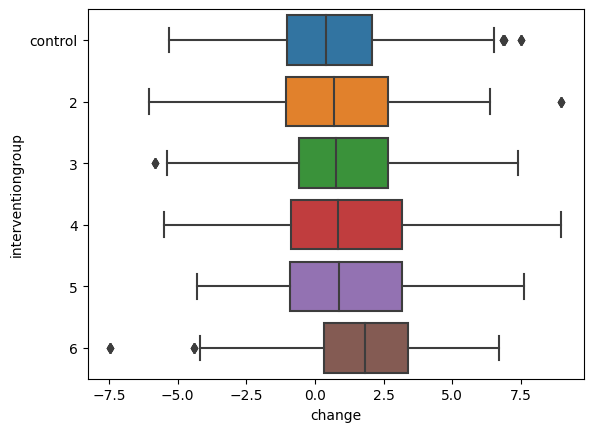

In [26]:
sns.boxplot(
    data=final_m,
    x="change",
    y="interventiongroup",
    showfliers=True,
    order=["control", "2", "3", "4", "5", "6"],
)

<AxesSubplot:xlabel='change', ylabel='interventiongroup'>

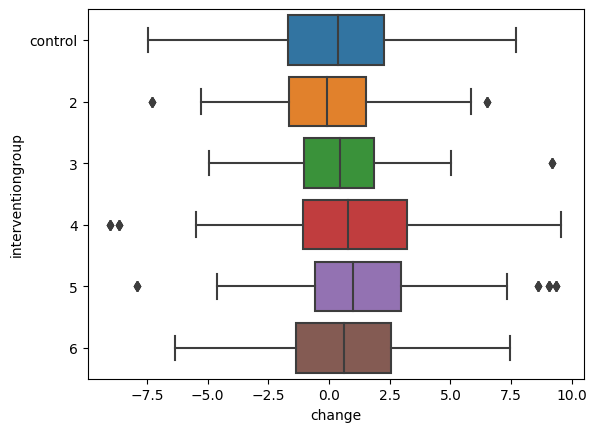

In [27]:
sns.boxplot(
    data=final_w,
    x="change",
    y="interventiongroup",
    showfliers=True,
    order=["control", "2", "3", "4", "5", "6"],
)

In [28]:
count = 5
for count in range(5,13):
    print('Jahrgang '+ str(count))
    print((final['Klassenstufe']==str(count)).sum())
    count = count + 1

Jahrgang 5
196
Jahrgang 6
484
Jahrgang 7
444
Jahrgang 8
832
Jahrgang 9
668
Jahrgang 10
560
Jahrgang 11
204
Jahrgang 12
148


In [48]:
#Aufteilung nach Klassenstufe
final_grade7 = final.loc[final.Klassenstufe == '7']
final_grade8 = final.loc[final.Klassenstufe == '8']
final_grade9 = final.loc[final.Klassenstufe == '9']

       UserID  ability_t1 interventiongroup Geschlecht Klassenstufe  \
184    728122     2.45977           control          m            7   
185    728122     2.45977           control          m            7   
186    728122     2.45977           control          m            7   
187    728122     2.45977           control          m            7   
188    728129     4.86489                 4          w            7   
...       ...         ...               ...        ...          ...   
3331  1036373    -2.72192                 2          m            7   
3552  1042127    -0.97320                 6          m            7   
3553  1042127    -0.97320                 6          m            7   
3554  1042127    -0.97320                 6          m            7   
3555  1042127    -0.97320                 6          m            7   

      ability_t2   change  
184      3.21113  0.75136  
185      3.21113  0.75136  
186      3.21113  0.75136  
187      3.21113  0.75136  
188    

In [49]:
intvcontrol_grade7 = final_grade7[(final_grade7["interventiongroup"] == "control")]
intv2_grade7 = final_grade7[(final_grade7["interventiongroup"] == "2")]
intv3_grade7 = final_grade7[(final_grade7["interventiongroup"] == "3")]
intv4_grade7 = final_grade7[(final_grade7["interventiongroup"] == "4")]
intv5_grade7 = final_grade7[(final_grade7["interventiongroup"] == "5")]
intv6_grade7 = final_grade7[(final_grade7["interventiongroup"] == "6")]

In [50]:
intvcontrol_grade8 = final_grade8[(final_grade8["interventiongroup"] == "control")]
intv2_grade8 = final_grade8[(final_grade8["interventiongroup"] == "2")]
intv3_grade8 = final_grade8[(final_grade8["interventiongroup"] == "3")]
intv4_grade8 = final_grade8[(final_grade8["interventiongroup"] == "4")]
intv5_grade8 = final_grade8[(final_grade8["interventiongroup"] == "5")]
intv6_grade8 = final_grade8[(final_grade8["interventiongroup"] == "6")]

In [51]:
intvcontrol_grade9 = final_grade9[(final_grade9["interventiongroup"] == "control")]
intv2_grade9 = final_grade9[(final_grade9["interventiongroup"] == "2")]
intv3_grade9 = final_grade9[(final_grade9["interventiongroup"] == "3")]
intv4_grade9 = final_grade9[(final_grade9["interventiongroup"] == "4")]
intv5_grade9 = final_grade9[(final_grade9["interventiongroup"] == "5")]
intv6_grade9 = final_grade9[(final_grade9["interventiongroup"] == "6")]

In [56]:
groups_grade7 = [intvcontrol_grade7, intv2_grade7, intv3_grade7, intv4_grade7, intv5_grade7, intv6_grade7]

for i in range(len(groups_grade7)):
    intv = groups_grade7[i]
    intv_name = [k for k, v in globals().items() if v is intv][0]
    print('Intervention group:', intv_name)
    
    for j in range(i+1, len(groups_grade7)):
        comparison = groups_grade7[j]
        comparison_name = [k for k, v in globals().items() if v is comparison][0]
        print('Comparison group:', comparison_name)
        
        common_cols = list(set(intv.columns).intersection(comparison.columns))

        intv_common = intv.reindex(columns=common_cols)
        comparison_common = comparison.reindex(columns=common_cols)
        
        print(stats.mannwhitneyu(intv_common['change'], comparison_common['change']))
        print(cliffs_delta(intv_common['change'], comparison_common['change'])[0])


Intervention group: intv
Comparison group: comparison
MannwhitneyuResult(statistic=2768.0, pvalue=0.13008739641000533)
0.16498316498316498
Comparison group: comparison
MannwhitneyuResult(statistic=3888.0, pvalue=0.3675518108607584)
-0.07954545454545454
Comparison group: comparison
MannwhitneyuResult(statistic=5888.0, pvalue=0.037043006069749314)
0.17384370015948963
Comparison group: comparison
MannwhitneyuResult(statistic=3712.0, pvalue=0.4879292122543254)
-0.06262626262626263
Comparison group: comparison
MannwhitneyuResult(statistic=4848.0, pvalue=0.6885768115887232)
-0.03349282296650718
Intervention group: intv
Comparison group: comparison
MannwhitneyuResult(statistic=864.0, pvalue=0.038818495680184195)
-0.25
Comparison group: comparison
MannwhitneyuResult(statistic=1344.0, pvalue=0.8835311017408222)
-0.017543859649122806
Comparison group: comparison
MannwhitneyuResult(statistic=832.0, pvalue=0.06084882683235471)
-0.22962962962962963
Comparison group: comparison
MannwhitneyuResult(st

<AxesSubplot:xlabel='change', ylabel='interventiongroup'>

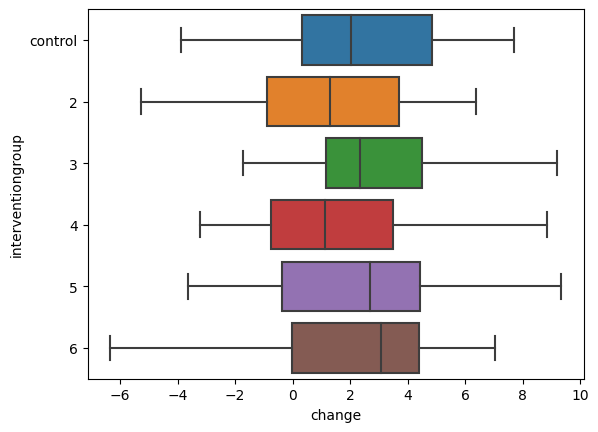

In [57]:
sns.boxplot(
    data=final_grade7,
    x="change",
    y="interventiongroup",
    showfliers=True,
    order=["control", "2", "3", "4", "5", "6"],
)

In [58]:
groups_grade8 = [intvcontrol_grade8, intv2_grade8, intv3_grade8, intv4_grade8, intv5_grade8, intv6_grade8]

for i in range(len(groups_grade8)):
    intv = groups_grade8[i]
    intv_name = [k for k, v in globals().items() if v is intv][0]
    print('Intervention group:', intv_name)
    
    for j in range(i+1, len(groups_grade8)):
        comparison = groups_grade8[j]
        comparison_name = [k for k, v in globals().items() if v is comparison][0]
        print('Comparison group:', comparison_name)
        
        common_cols = list(set(intv.columns).intersection(comparison.columns))

        intv_common = intv.reindex(columns=common_cols)
        comparison_common = comparison.reindex(columns=common_cols)
        
        print(stats.mannwhitneyu(intv_common['change'], comparison_common['change']))
        print(cliffs_delta(intv_common['change'], comparison_common['change'])[0])


Intervention group: intv
Comparison group: comparison
MannwhitneyuResult(statistic=10352.0, pvalue=0.5508093234215216)
0.04186795491143317
Comparison group: comparison
MannwhitneyuResult(statistic=12192.0, pvalue=0.0060059430205656565)
-0.17173913043478262
Comparison group: comparison
MannwhitneyuResult(statistic=12800.0, pvalue=0.036929257025105196)
-0.13043478260869565
Comparison group: comparison
MannwhitneyuResult(statistic=8480.0, pvalue=0.0006333985438064545)
-0.2318840579710145
Comparison group: comparison
MannwhitneyuResult(statistic=7552.0, pvalue=0.012686798335458372)
-0.1791304347826087
Intervention group: intv
Comparison group: comparison
MannwhitneyuResult(statistic=6464.0, pvalue=0.00047263598936853865)
-0.2518518518518518
Comparison group: comparison
MannwhitneyuResult(statistic=6960.0, pvalue=0.0069593523729231934)
-0.19444444444444445
Comparison group: comparison
MannwhitneyuResult(statistic=4752.0, pvalue=0.0005124356561407239)
-0.26666666666666666
Comparison group: c

<AxesSubplot:xlabel='change', ylabel='interventiongroup'>

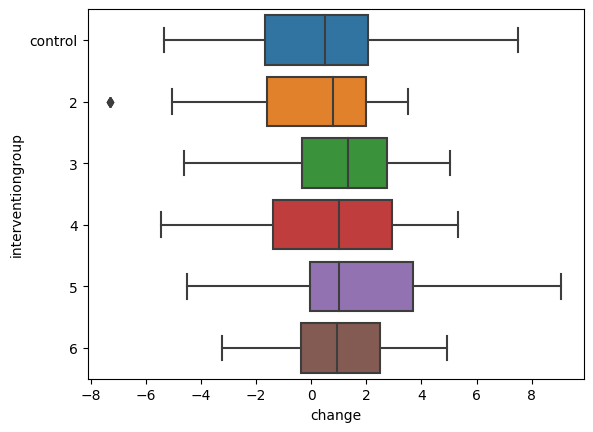

In [59]:
sns.boxplot(
    data=final_grade8,
    x="change",
    y="interventiongroup",
    showfliers=True,
    order=["control", "2", "3", "4", "5", "6"],
)

In [60]:
groups_grade9 = [intvcontrol_grade9, intv2_grade9, intv3_grade9, intv4_grade9, intv5_grade9, intv6_grade9]

for i in range(len(groups_grade9)):
    intv = groups_grade9[i]
    intv_name = [k for k, v in globals().items() if v is intv][0]
    print('Intervention group:', intv_name)
    
    for j in range(i+1, len(groups_grade9)):
        comparison = groups_grade9[j]
        comparison_name = [k for k, v in globals().items() if v is comparison][0]
        print('Comparison group:', comparison_name)
        
        common_cols = list(set(intv.columns).intersection(comparison.columns))

        intv_common = intv.reindex(columns=common_cols)
        comparison_common = comparison.reindex(columns=common_cols)
        
        print(stats.mannwhitneyu(intv_common['change'], comparison_common['change']))
        print(cliffs_delta(intv_common['change'], comparison_common['change'])[0])


Intervention group: intv
Comparison group: comparison
MannwhitneyuResult(statistic=7248.0, pvalue=0.701024668529524)
0.029545454545454545
Comparison group: comparison
MannwhitneyuResult(statistic=8240.0, pvalue=0.11222143203044944)
-0.11206896551724138
Comparison group: comparison
MannwhitneyuResult(statistic=4640.0, pvalue=1.3523245871425972e-12)
-0.5
Comparison group: comparison
MannwhitneyuResult(statistic=6208.0, pvalue=0.038711186951652626)
-0.1565217391304348
Comparison group: comparison
MannwhitneyuResult(statistic=4192.0, pvalue=1.1925419118966372e-09)
-0.45416666666666666
Intervention group: intv
Comparison group: comparison
MannwhitneyuResult(statistic=4560.0, pvalue=0.19300841280640924)
-0.10658307210031348
Comparison group: comparison
MannwhitneyuResult(statistic=2784.0, pvalue=2.7696278507131312e-08)
-0.45454545454545453
Comparison group: comparison
MannwhitneyuResult(statistic=3584.0, pvalue=0.1846143576840782)
-0.11462450592885376
Comparison group: comparison
Mannwhitney

<AxesSubplot:xlabel='change', ylabel='interventiongroup'>

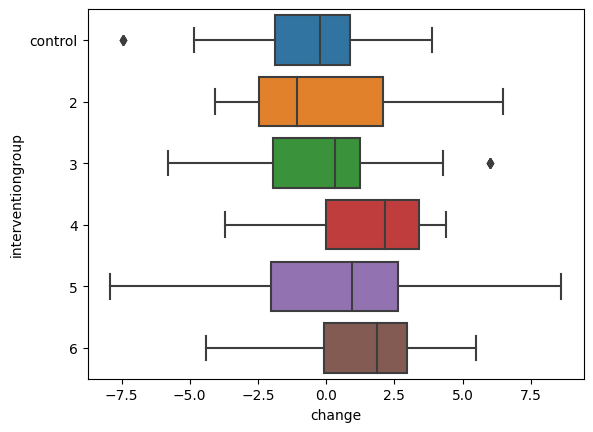

In [61]:
sns.boxplot(
    data=final_grade9,
    x="change",
    y="interventiongroup",
    showfliers=True,
    order=["control", "2", "3", "4", "5", "6"],
)